In [1]:
# This part imports the required packages
using LinearAlgebra
using Pkg
Pkg.add("SpecialPolynomials")
Pkg.add("Polynomials")
Pkg.add("PyPlot")
Pkg.add("SpecialFunctions")
Pkg.add("HypergeometricFunctions")
Pkg.add("LaTeXStrings")

    Updating registry at `~/.julia/registries/General.toml`
   Resolving package versions...
  No Changes to `~/.julia/environments/v1.8/Project.toml`
  No Changes to `~/.julia/environments/v1.8/Manifest.toml`
   Resolving package versions...
  No Changes to `~/.julia/environments/v1.8/Project.toml`
  No Changes to `~/.julia/environments/v1.8/Manifest.toml`
   Resolving package versions...
  No Changes to `~/.julia/environments/v1.8/Project.toml`
  No Changes to `~/.julia/environments/v1.8/Manifest.toml`
   Resolving package versions...
  No Changes to `~/.julia/environments/v1.8/Project.toml`
  No Changes to `~/.julia/environments/v1.8/Manifest.toml`
   Resolving package versions...
  No Changes to `~/.julia/environments/v1.8/Project.toml`
  No Changes to `~/.julia/environments/v1.8/Manifest.toml`
   Resolving package versions...
  No Changes to `~/.julia/environments/v1.8/Project.toml`
  No Changes to `~/.julia/environments/v1.8/Manifest.toml`


In [2]:
# This is a function for square sized matrix for marcenko_pasture distribution, ratio c = 1
function marcenko_pasture(x)
    return sqrt(4 - (x-2)^2)/(2 *pi*x)
end
    

marcenko_pasture (generic function with 1 method)

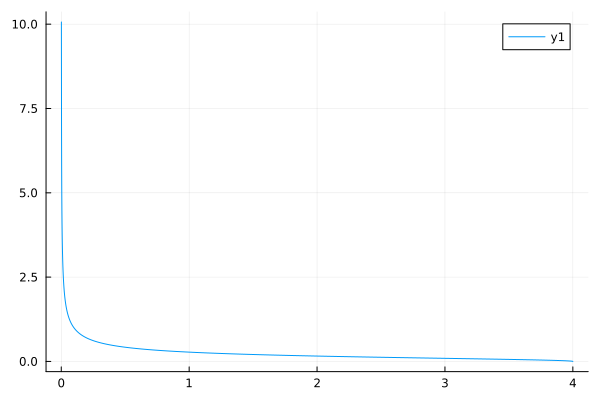

In [3]:
# This code block gives the theoretical distrbiution of Marcenko_pasture
using Plots
sample_points = 0.001:0.001:4
marcenko_sample = zeros(size(sample_points))
for i = 1:length(sample_points)
    marcenko_sample[i] = marcenko_pasture(sample_points[i])
end
plot(sample_points,marcenko_sample)
    


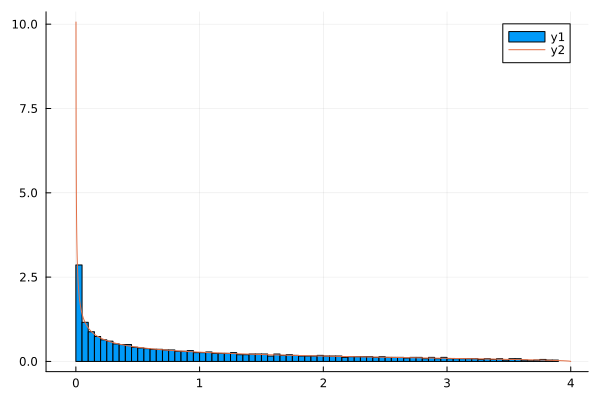

In [4]:
# This code block produces eigenvalues for the Marceonko pasture distrbution and plots the t
# heoretical and experimental parts
n = 1000
X = randn(n,n) + im*randn(n,n)
A = X*X'
eigs = sort(eigvals(Hermitian(A/tr(A))))
eigs = n*eigs[1:end]
histogram(eigs, normalize=:pdf, bins=80)
plot!(sample_points, marcenko_sample)

In [5]:
using HypergeometricFunctions
using SpecialFunctions

The following 3 code blocks are for computing the Fuss Catalan distribution

In [6]:
function Lambdans(n,s)
    constant_part = s^(-3/2) * sqrt((s+1)/(2*pi)) * (s^(s/(s+1))/(s+1))^n 
    gamma_part = 1
    for i = 1:s
        if i < n
            gamma_part = gamma_part * gamma((i-n)/(s+1))
        end
        if i > n
            gamma_part = gamma_part * gamma((i-n)/(s+1))
        end
        gamma_part = gamma_part * (1/gamma(((i+1)/s)-(n/(s+1))))
    end
    return constant_part * gamma_part
end

Lambdans (generic function with 1 method)

In [7]:
function Hypergeometric_part(n,s,x)
    num = []
    denum = []
    for j = 1:s
        if j != n
            push!(denum,1+ ((n-j)/(s+1)))
        end        
        push!(num, 1 - (1/s + j/s) + (n /(s+1)) )
    end
    return pFq((num...,), (denum...,), ((s^s)/((s+1)^(s+1))) * x)
end
    

Hypergeometric_part (generic function with 1 method)

In [8]:
function FussCatalan(s,x)
    sum = 0
    for n =1:s
        sum = Lambdans(n,s) * Hypergeometric_part(n,s,x) * (x^(n/(s+1) - 1)) + sum
    end
    return sum
end

FussCatalan (generic function with 1 method)

The following code block produces normalized eigenvalues for the Fuss Catalan distributions

In [9]:
function eigvals_product_ginibri(s,n)
    X = diagm(ones(n))
    for i =1:s
        X = X *(randn(n,n) + im * randn(n,n))
    end
    A = X*X'
    return n* eigvals(Hermitian(A/tr(A)))
end

eigvals_product_ginibri (generic function with 1 method)

Following two codeblocks produce theoretical and experimental plot data for the Fuss Catalan distributions

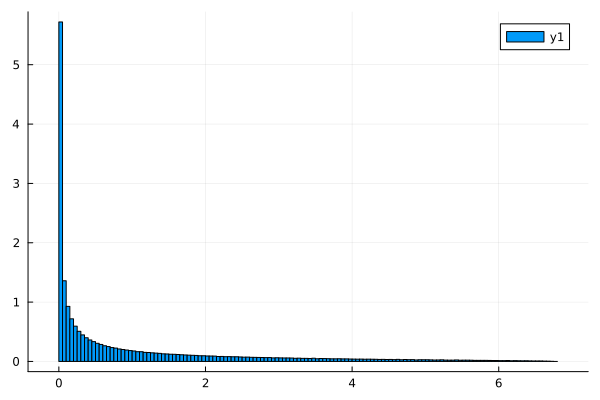

In [10]:
sample_size = 100
matrix_size = 1000
order = 2
ginibri_2 = eigvals_product_ginibri(2,matrix_size)
ginibri_3 = eigvals_product_ginibri(3,matrix_size)
ginibri_4 = eigvals_product_ginibri(4,matrix_size)
ginibri_5 = eigvals_product_ginibri(5,matrix_size)
ginibri_6 = eigvals_product_ginibri(6,matrix_size)
ginibri_7 = eigvals_product_ginibri(7,matrix_size)
for i = 1:sample_size
    append!(ginibri_2,eigvals_product_ginibri(2,matrix_size))
    append!(ginibri_3,eigvals_product_ginibri(3,matrix_size))
    append!(ginibri_4,eigvals_product_ginibri(4,matrix_size))
    append!(ginibri_5,eigvals_product_ginibri(5,matrix_size))
    append!(ginibri_6,eigvals_product_ginibri(6,matrix_size))
    append!(ginibri_7,eigvals_product_ginibri(7,matrix_size))
end
histogram(ginibri_2, normalize=:pdf, bins=160)

In [11]:
using Plots
sample_points_1 = 0.01:0.0001:(4)
sample_points_2 = 0.01:0.0001:(27/4)
sample_points_3 = 0.01:0.0001:(256/27)
sample_points_4 = 0.01:0.0001:(125*25/256)
sample_points_5 = 0.01:0.0001:(6^6/5^5)
sample_points_6 = 0.01:0.0001:(7^7/6^6)
sample_points_7 = 0.01:0.0001:(8^8/7^7)
Fuss_catalan_sample_1 = zeros(size(sample_points_1))
Fuss_catalan_sample_2 = zeros(size(sample_points_2))
Fuss_catalan_sample_3 = zeros(size(sample_points_3))
Fuss_catalan_sample_4 = zeros(size(sample_points_4))
Fuss_catalan_sample_5 = zeros(size(sample_points_5))
Fuss_catalan_sample_6 = zeros(size(sample_points_6))
Fuss_catalan_sample_7 = zeros(size(sample_points_7))

for i = 1:length(sample_points_1)
    Fuss_catalan_sample_1[i] = FussCatalan(1,sample_points_1[i])
end
print("First is complete \n")
for i = 1:length(sample_points_2)
    Fuss_catalan_sample_2[i] = FussCatalan(2,sample_points_2[i])
end
print("Second is complete \n")
for i = 1:length(sample_points_3)
    Fuss_catalan_sample_3[i] = FussCatalan(3,sample_points_3[i])
end
print("Third is complete \n")
for i = 1:length(sample_points_4)
    Fuss_catalan_sample_4[i] = FussCatalan(4,sample_points_4[i])
end
print("Fourth is complete \n")
for i = 1:length(sample_points_5)
    Fuss_catalan_sample_5[i] = FussCatalan(5,sample_points_5[i])
end
print("Fifth is complete \n")
for i = 1:length(sample_points_6)
    Fuss_catalan_sample_6[i] = FussCatalan(6,sample_points_6[i])
end
print("Sixth is complete \n")
for i = 1:length(sample_points_7)
    Fuss_catalan_sample_7[i] = FussCatalan(7,sample_points_7[i])
end
print("Seventh is complete \n")
#plot(sample_points_1,Fuss_catalan_sample_1)
#plot!(sample_points_2, Fuss_catalan_sample_2)
#plot!(sample_points_3, Fuss_catalan_sample_3)
#plot!(sample_points_4, Fuss_catalan_sample_4)
#plot!(sample_points_5, Fuss_catalan_sample_5)
#plot!(sample_points_6, Fuss_catalan_sample_6)
#plot!(sample_points_7, Fuss_catalan_sample_7)
#ylims!(0,0.28)
#xlims!(1,13)

First is complete 
Second is complete 
Third is complete 
Fourth is complete 
Fifth is complete 
Sixth is complete 
Seventh is complete 


From this block onwards produce the plots used in the Final report

In [1]:
using Plots
using LaTeXStrings
histogram(ginibri_2, normalize=:pdf, bins=160, label="Experiment")
plot!(sample_points_2,Fuss_catalan_sample_2, label="Theory")
xlabel!("x")
ylabel!("\$\\pi^{2} (x)\$")
title!("Fuss-Catalan Distribution of order \$2\$")

LoadError: UndefVarError: `ginibri_2` not defined

In [2]:
plot(sample_points_1, Fuss_catalan_sample_1, label = "\$ k = 1 \$")
plot!(sample_points_2, Fuss_catalan_sample_2, label = "\$ k = 2 \$")
plot!(sample_points_3, Fuss_catalan_sample_3, label = "\$ k = 3 \$")
plot!(sample_points_4, Fuss_catalan_sample_4, label = "\$ k = 4 \$")
plot!(sample_points_5, Fuss_catalan_sample_5, label = "\$ k = 5 \$")
xlabel!("x")
ylabel!("\$\\pi^{k} (x)\$")
title!("Fuss-Catalan Distributions")
xlims!(0.1,4)
ylims!(0,1)
savefig("Fuss_Catalans.pdf")

LoadError: UndefVarError: `sample_points_1` not defined